In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.display import HTML

In [2]:
import numpy as np

In [3]:
from torch.utils.data import Subset

In [4]:
from lib.dataset import unpack_drawings
from lib.dataset import get_n_points
from lib.dataset import get_dataset, get_train_val_idxs, get_batches
from lib.dataset import strokes_to_points, points_to_strokes
from lib.plot import get_canvas, plot, get_animation

In [5]:
dataset = unpack_drawings('./data/The Eiffel Tower.bin')
dataset = list(dataset)

In [6]:
good_drawings, bad_drawings = [], []
for item in dataset:
    if item['recognized']:
        good_drawings.append(item['image'])
    else:
        bad_drawings.append(item['image'])

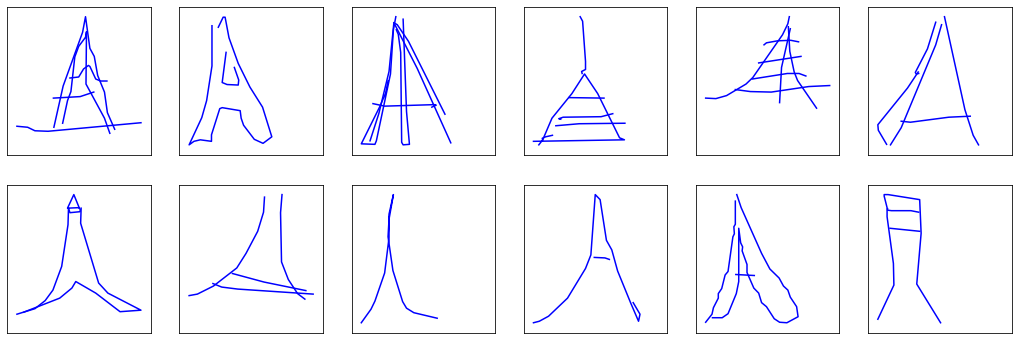

In [7]:
fig, axarr = get_canvas(2, 6)

for i, ax in enumerate(axarr.flatten()):
    plot(good_drawings[i], color='b', ax=ax)

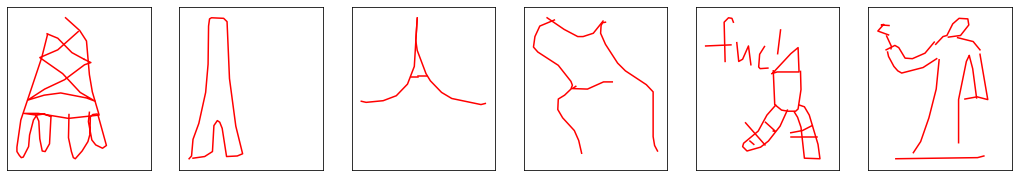

In [8]:
fig, axarr = get_canvas(1, 6)

for i, ax in enumerate(axarr.flatten()):
    plot(bad_drawings[i], color='r', ax=ax)

In [9]:
%%capture
idx = np.random.choice(range(len(good_drawings)))
anim = get_animation(good_drawings[idx], 'b')

In [10]:
HTML(anim.to_html5_video())

In [11]:
anim.save('effeil.gif', dpi=80, writer='imagemagick')

In [12]:
drawings = [drawing for drawing in good_drawings if 10 <= get_n_points(drawing) <= 50]
ds = get_dataset(drawings)

In [13]:
train_idxs, val_idxs = get_train_val_idxs(len(ds), sample_ratio=0.01)

train_ds = Subset(ds, train_idxs)
val_ds = Subset(ds, val_idxs)

len(train_ds), len(val_ds)

(943, 314)

In [14]:
train_batches = get_batches(train_ds, batch_size=3)
data_batch, labels_batch, lens_batch = next(iter(train_batches))
data_batch.shape, labels_batch.shape, lens_batch.shape

(torch.Size([72, 3, 2]), torch.Size([72, 3, 2]), torch.Size([3]))

In [15]:
drawing = data_batch[:, 0].tolist()
strokes = points_to_strokes(drawing)

In [16]:
%%capture
anim = get_animation(strokes)

In [17]:
HTML(anim.to_html5_video())